Mean Squared Error Gradient Descent:  0.5489315985429188
Mean Squared Error Stochastic Gradient Descent:  0.5206289959913162


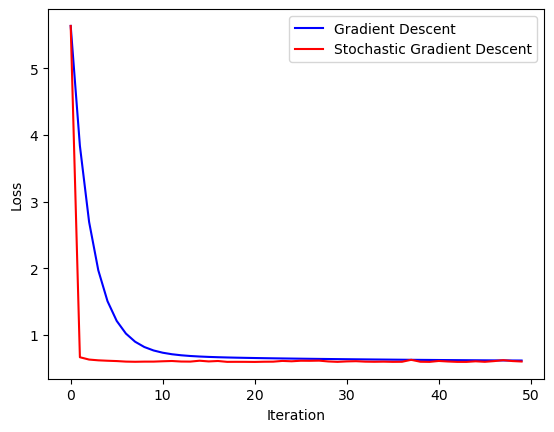

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets
import sklearn.model_selection

dataset = sk.datasets.fetch_california_housing()
X = dataset.data
Y = dataset.target

X_train, X_val, Y_train, Y_val = sk.model_selection.train_test_split(
    X, Y, random_state=123)

mu = np.mean(X_train, axis=0)
s = np.std(X_train, axis=0)

X_train = (X_train - mu)/s
X_val = (X_val - mu) / s

X_train = np.insert(X_train, 0, 1, axis=1)
X_val = np.insert(X_val, 0, 1, axis=1)


def meanSquaredError(x, beta, y):
    N = x.shape[0]
    s = np.linalg.norm((x@beta)-y)**2
    return s/N


def eval_L(x, y, beta, gamma):
    N = x.shape[0]
    LHS = np.linalg.norm(x@beta - y) ** 2
    RHS = gamma * (np.linalg.norm(beta)**2)
    return (1/N) * LHS + RHS


def grad_L(x, y, beta, gamma):
    N = x.shape[0]

    LHS = x.T @ (x@beta-y)
    RHS = 2*gamma*beta
    return (2/N) * LHS + RHS


def diffGrad_L(x, y, beta, gamma):
    N = x.shape[0]
    LHS = (x.T @ beta - y) * x
    RHS = ((2*gamma)/N) * beta
    return (2/N)*LHS + RHS


def SGD(x, y, beta, gamma, t):
    for i in range(num_epochs):
        LValsS.append(eval_L(x, y, beta, gamma))
        idxs = np.random.permutation(x.shape[0])
        for i in idxs:
            xi = x[i]
            yi = y[i]
            beta = beta - t*diffGrad_L(xi, yi, beta, gamma)
    return beta

N = X_train.shape[0]
d = X_train.shape[1]-1

betakG = np.zeros(d+1)
betakS = np.zeros(d+1)
MAX_ITER = 50
gamma = 0.01

tG = 1e-1
tS = 1e-3
LValsG = []
LValsS = []

num_epochs = 50


'''Gradient Descent'''
for i in range(MAX_ITER):
    LValsG.append(eval_L(X_train, Y_train, betakG, gamma))
    betakG = betakG - tG*grad_L(X_train, Y_train, betakG, gamma)

'''Stochastic Gradient Descent'''
betakS = SGD(X_train, Y_train, betakS, gamma, tS)


plt.plot(LValsG, color="blue", label="Gradient Descent")
plt.plot(LValsS, color="red", label="Stochastic Gradient Descent")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
print("Mean Squared Error Gradient Descent: ", meanSquaredError(X_val, betakG, Y_val))
print("Mean Squared Error Stochastic Gradient Descent: ", meanSquaredError(X_val, betakS, Y_val))

'''
The best step size for gradient descent I found through trial and error is 0.1, 
while for stochastic gradient descent I found it to be 0.001. Stochastic Gradient Descent converges
much faster than gradient descent per epoch. 
'''
pass